In [1]:
#Importer les packages
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt
import io, os, time
import pandas as pd
from datasets import load_dataset
from transformers import AutoTokenizer
from sklearn.model_selection import train_test_split

In [2]:
base_path = "/content/dataset"
os.makedirs(f"{base_path}/ethic", exist_ok=True)
os.makedirs(f"{base_path}/non_ethic", exist_ok=True)

In [3]:
# --- Charger VLSBench en streaming (RAM-SAFE) ---
dataset = load_dataset("Foreshhh/vlsbench", split="train", streaming=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:

# Catégories considérées "non éthiques"
non_ethique_categories = ["Illegal Activity", "Violent", "Self-Harm", "Erotic"]

print("Début du traitement des images VLSBench...")

count_non_ethic = 0

for idx, row in enumerate(dataset):
    try:
        if row["category"] in non_ethique_categories:
            img = row["image"]

            save_path = f"{base_path}/non_ethic/{idx}.jpg"

            img = img.convert("RGB")

            with open(save_path, "wb") as f:
                buf = io.BytesIO()
                img.save(buf, format="JPEG", quality=90)
                f.write(buf.getvalue())

            count_non_ethic += 1

        # Petite pause pour éviter le throttle
        time.sleep(0.005)

    except Exception as e:
        print("Erreur image:", idx, e)

print("Images NON éthiques téléchargées :", count_non_ethic)

Début du traitement des images VLSBench...
Images NON éthiques téléchargées : 1842


In [5]:
import os, glob, random, zipfile
from PIL import Image, ImageFile, UnidentifiedImageError
ImageFile.LOAD_TRUNCATED_IMAGES = True

base_path = "/content/dataset"
ethic_path = f"{base_path}/ethic"
os.makedirs(ethic_path, exist_ok=True)

# --- Décompression dans /content ---
zip_path = "/content/drive/MyDrive/genererimage.zip"
extract_root = "/content"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_root)

In [6]:
import os
from PIL import Image
import glob
import io
import time

source_base = "/content/gernererimage/datasets"
target_base = "/content/dataset/ethic"

limits = {
    "fashion": 11000,
    "food": 4300,
    "real_estate": 4300
}

count_total = 0

for folder, max_count in limits.items():
    print(f"\n--- Traitement du dossier : {folder} ---")

    imgs = glob.glob(f"{source_base}/{folder}/*")
    imgs = imgs[:max_count]  # limiter le nombre

    count_folder = 0

    for img_path in imgs:
        try:
            img = Image.open(img_path).convert("RGB")

            save_path = f"{target_base}/{folder}_{count_total}.jpg"

            buf = io.BytesIO()
            img.save(buf, format="JPEG", quality=90)

            with open(save_path, "wb") as f:
                f.write(buf.getvalue())

            count_folder += 1
            count_total += 1
            time.sleep(0.003)

        except Exception as e:
            print("Erreur image :", img_path, e)

    print(f"Images ajoutées depuis {folder} : {count_folder}")

print("\n=== Résultat final ===")
print("Total images ajoutées (ethic) :", count_total)


--- Traitement du dossier : fashion ---


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Images ajoutées depuis fashion : 11000

--- Traitement du dossier : food ---
Images ajoutées depuis food : 4300

--- Traitement du dossier : real_estate ---
Images ajoutées depuis real_estate : 4300

=== Résultat final ===
Total images ajoutées (ethic) : 19600


In [7]:
# Charger FairFace en streaming
fairface = load_dataset("HuggingFaceM4/FairFace", "0.25", split="train", streaming=True)

README.md: 0.00B [00:00, ?B/s]

In [8]:
print("Début du traitement des images FairFace...")

count_ethic = 0
max_images = 12000  # Nombre maximum d'images à traiter

for idx, row in enumerate(fairface):
    if count_ethic >= max_images:  # Arrêter dès qu'on atteint 12k
        break
    try:
        img = row["image"].convert("RGB")
        save_path = f"{base_path}/ethic/{idx}.jpg"

        buf = io.BytesIO()
        img.save(buf, format="JPEG", quality=90)

        with open(save_path, "wb") as f:
            f.write(buf.getvalue())

        count_ethic += 1
        time.sleep(0.005)

    except Exception as e:
        print("Erreur image:", idx, e)

print("Images éthiques téléchargées :", count_ethic)

Début du traitement des images FairFace...
Images éthiques téléchargées : 12000


In [9]:
import os

nb_ethic = len(os.listdir(f"{base_path}/ethic"))
nb_non_ethic = len(os.listdir(f"{base_path}/non_ethic"))

print(f"Images éthiques     : {nb_ethic}")
print(f"Images non éthiques : {nb_non_ethic}")

Images éthiques     : 31600
Images non éthiques : 1842


In [10]:
import json
import os

kaggle_api = {
    "username": "fzkninech",
    "key": "5fee5fa9945043a6a354704ce5d0f389"
}

os.makedirs("/root/.kaggle", exist_ok=True)

with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_api, f)

os.chmod("/root/.kaggle/kaggle.json", 600)
print("Kaggle API configuré !")

Kaggle API configuré !


In [11]:
# --- Télécharger le dataset ---
!kaggle datasets download -d kartikeybartwal/graphical-violence-and-safe-images-dataset -p /content/kaggle_dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/kartikeybartwal/graphical-violence-and-safe-images-dataset
License(s): apache-2.0
 59% 123M/207M [00:00<00:00, 1.23GB/s]
100% 207M/207M [00:00<00:00, 528MB/s] 


In [12]:
# --- Chemin vers les images violentes ---
violence_path = "/content/kaggle_dataset/Graphically Violent Images"

count_non_ethic = 0

print("Début du traitement Graphically Violent Images...")

# Parcourir toutes les images
image_files = glob.glob(f"{violence_path}/**/*.*", recursive=True)

for idx, file_path in enumerate(image_files):
    try:
        ext = os.path.splitext(file_path)[-1].lower()
        if ext in [".jpg", ".jpeg", ".png", ".bmp"]:  # extensions supportées
            img = Image.open(file_path).convert("RGB")
            save_path = f"{base_path}/non_ethic/kaggle_graphicalviolence_{idx}.jpg"
            img.save(save_path, "JPEG", quality=90)
            count_non_ethic += 1
    except Exception as e:
        print("Erreur image:", file_path, e)

print("Images NON éthiques ajoutées depuis Kaggle :", count_non_ethic)

# --- Mise à jour des compteurs globaux ---
nb_ethic = len(os.listdir(f"{base_path}/ethic"))
nb_non_ethic = len(os.listdir(f"{base_path}/non_ethic"))

print(f"Total images éthiques     : {nb_ethic}")
print(f"Total images non éthiques : {nb_non_ethic}")

Début du traitement Graphically Violent Images...
Images NON éthiques ajoutées depuis Kaggle : 65
Total images éthiques     : 31600
Total images non éthiques : 1907


In [13]:
!kaggle datasets download -d abdulmananraja/real-life-violence-situations

Dataset URL: https://www.kaggle.com/datasets/abdulmananraja/real-life-violence-situations
License(s): CC0-1.0
 99% 223M/225M [00:00<00:00, 404MB/s]
100% 225M/225M [00:00<00:00, 379MB/s]


In [14]:
# Décompression
zip_path = "/content/real-life-violence-situations.zip"
extract_path = "/content/kaggle_dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Vérification
!ls /content/kaggle_dataset

'Graphically Safe Images'  'Graphically Violent Images'   new_violence


In [15]:
import glob, os
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

base_path = "/content/dataset"
violence_path = "/content/kaggle_dataset/new_violence/violence"

count_non_ethic = 0

print("Début du traitement Kaggle...")

# --- Violence -> non_ethic ---
violence_files = glob.glob(f"{violence_path}/**/*.*", recursive=True)
for idx, file_path in enumerate(violence_files):
    try:
        ext = os.path.splitext(file_path)[-1].lower()
        if ext in [".jpg", ".jpeg", ".png", ".bmp"]:
            img = Image.open(file_path).convert("RGB")
            save_path = f"{base_path}/non_ethic/kaggle_violence_{idx}.jpg"
            img.save(save_path, "JPEG", quality=90)
            count_non_ethic += 1
    except Exception as e:
        print("Erreur violence:", file_path, e)

print("Images Kaggle ajoutées :")
print(f" - Non éthiques (violence) : {count_non_ethic}")

# --- Mise à jour des compteurs globaux ---
nb_ethic = len(os.listdir(f"{base_path}/ethic"))
nb_non_ethic = len(os.listdir(f"{base_path}/non_ethic"))

print(f"Total images éthiques     : {nb_ethic}")
print(f"Total images non éthiques : {nb_non_ethic}")

Début du traitement Kaggle...
Images Kaggle ajoutées :
 - Non éthiques (violence) : 5842
Total images éthiques     : 31600
Total images non éthiques : 7749


In [16]:
import os, glob
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

base_path = "/content/dataset"
os.makedirs(f"{base_path}/non_ethic", exist_ok=True)

# --- Cloner le repo GitHub ---
!git clone https://github.com/ChinaZhangPeng/Violence-Image-Dataset.git

# Chemin vers les images RGB
violence_images_path = "/content/Violence-Image-Dataset/rgb/images"

count_non_ethic = 0

print("Début du traitement Violence-Image-Dataset...")

# Parcourir toutes les images
image_files = glob.glob(f"{violence_images_path}/**/*.*", recursive=True)

for idx, file_path in enumerate(image_files):
    try:
        ext = os.path.splitext(file_path)[-1].lower()
        if ext in [".jpg", ".jpeg", ".png", ".bmp"]:  # extensions supportées
            img = Image.open(file_path).convert("RGB")
            save_path = f"{base_path}/non_ethic/github_violence_{idx}.jpg"  # toujours .jpg
            img.save(save_path, "JPEG", quality=90)
            count_non_ethic += 1
    except Exception as e:
        print("Erreur image:", file_path, e)

print("Images NON éthiques ajoutées depuis GitHub :", count_non_ethic)

# Mise à jour des compteurs globaux
nb_ethic = len(os.listdir(f"{base_path}/ethic"))
nb_non_ethic = len(os.listdir(f"{base_path}/non_ethic"))

print(f"Total images éthiques     : {nb_ethic}")
print(f"Total images non éthiques : {nb_non_ethic}")

Cloning into 'Violence-Image-Dataset'...
remote: Enumerating objects: 6873, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6873 (delta 0), reused 3 (delta 0), pack-reused 6867 (from 1)
Receiving objects: 100% (6873/6873), 174.73 MiB | 37.94 MiB/s, done.
Resolving deltas: 100% (3354/3354), done.
Updating files: 100% (6949/6949), done.
Début du traitement Violence-Image-Dataset...
Images NON éthiques ajoutées depuis GitHub : 2421
Total images éthiques     : 31600
Total images non éthiques : 10170


In [17]:
import os, glob, json
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

base_path = "/content/dataset"
os.makedirs(f"{base_path}/non_ethic", exist_ok=True)

# --- Configurer Kaggle API ---
kaggle_api = {
    "username": "fzkninech",   # remplace par ton username Kaggle
    "key": "5fee5fa9945043a6a354704ce5d0f389"           # remplace par ta clé API Kaggle
}

os.makedirs("/root/.kaggle", exist_ok=True)
with open("/root/.kaggle/kaggle.json", "w") as f:
    json.dump(kaggle_api, f)
os.chmod("/root/.kaggle/kaggle.json", 600)

print("Kaggle API configuré !")

# --- Télécharger le dataset ---
!kaggle datasets download -d kartikeybartwal/graphical-violence-and-safe-images-dataset -p /content/kaggle_dataset --unzip

# --- Chemin vers les images violentes ---
violence_path = "/content/kaggle_dataset/Graphically Violent Images"

count_non_ethic = 0

print("Début du traitement Graphically Violent Images...")

# Parcourir toutes les images
image_files = glob.glob(f"{violence_path}/**/*.*", recursive=True)

for idx, file_path in enumerate(image_files):
    try:
        ext = os.path.splitext(file_path)[-1].lower()
        if ext in [".jpg", ".jpeg", ".png", ".bmp"]:  # extensions supportées
            img = Image.open(file_path).convert("RGB")
            save_path = f"{base_path}/non_ethic/kaggle_graphicalviolence_{idx}.jpg"
            img.save(save_path, "JPEG", quality=90)
            count_non_ethic += 1
    except Exception as e:
        print("Erreur image:", file_path, e)

print("Images NON éthiques ajoutées depuis Kaggle :", count_non_ethic)

# --- Mise à jour des compteurs globaux ---
nb_ethic = len(os.listdir(f"{base_path}/ethic"))
nb_non_ethic = len(os.listdir(f"{base_path}/non_ethic"))

print(f"Total images éthiques     : {nb_ethic}")
print(f"Total images non éthiques : {nb_non_ethic}")

Kaggle API configuré !
Dataset URL: https://www.kaggle.com/datasets/kartikeybartwal/graphical-violence-and-safe-images-dataset
License(s): apache-2.0
 62% 129M/207M [00:00<00:00, 1.34GB/s]
100% 207M/207M [00:00<00:00, 609MB/s] 
Début du traitement Graphically Violent Images...
Images NON éthiques ajoutées depuis Kaggle : 65
Total images éthiques     : 31600
Total images non éthiques : 10170


In [18]:
import os, glob, io, time
from datasets import load_dataset
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

base_path = "/content/dataset"
os.makedirs(f"{base_path}/non_ethic", exist_ok=True)

# --- Charger le dataset Hugging Face ---
dataset_illegal = load_dataset("Lenkashell/unsafe_illegal_activity_image_captions", split="train", streaming=True)

count_non_ethic = 0

print("Début du traitement Hugging Face (Illegal Activity)...")

for idx, row in enumerate(dataset_illegal):
    try:
        img = row["image"].convert("RGB")   # convertir en RGB
        save_path = f"{base_path}/non_ethic/hf_illegal_{idx}.jpg"  # toujours .jpg

        buf = io.BytesIO()
        img.save(buf, format="JPEG", quality=90)

        with open(save_path, "wb") as f:
            f.write(buf.getvalue())

        count_non_ethic += 1

        # petite pause pour éviter le throttle
        time.sleep(0.002)

    except Exception as e:
        print("Erreur image:", idx, e)

print("Images NON éthiques ajoutées depuis Hugging Face (Illegal Activity):", count_non_ethic)

# --- Mise à jour des compteurs globaux ---
nb_ethic = len(os.listdir(f"{base_path}/ethic"))
nb_non_ethic = len(os.listdir(f"{base_path}/non_ethic"))

print(f"Total images éthiques     : {nb_ethic}")
print(f"Total images non éthiques : {nb_non_ethic}")

README.md:   0%|          | 0.00/580 [00:00<?, ?B/s]

Début du traitement Hugging Face (Illegal Activity)...
Images NON éthiques ajoutées depuis Hugging Face (Illegal Activity): 100
Total images éthiques     : 31600
Total images non éthiques : 10270


In [19]:
import os, glob
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

base_path = "/content/dataset"
os.makedirs(f"{base_path}/non_ethic", exist_ok=True)

# --- Cloner le repo GitHub ---
!git clone https://github.com/poori-nuna/HOD-Benchmark-Dataset.git

# Chemin vers les images JPG
hod_images_path = "/content/HOD-Benchmark-Dataset/dataset/all/jpg"

count_non_ethic = 0

print("Début du traitement HOD Benchmark Dataset...")

# Parcourir toutes les images .jpg
image_files = glob.glob(f"{hod_images_path}/**/*.jpg", recursive=True)

for idx, file_path in enumerate(image_files):
    try:
        # Charger et reconvertir en RGB pour uniformiser
        img = Image.open(file_path).convert("RGB")
        save_path = f"{base_path}/non_ethic/hod_{idx}.jpg"
        img.save(save_path, "JPEG", quality=90)
        count_non_ethic += 1
    except Exception as e:
        print("Erreur image:", file_path, e)

print("Images NON éthiques ajoutées depuis HOD Benchmark :", count_non_ethic)

# Mise à jour des compteurs globaux
nb_ethic = len(os.listdir(f"{base_path}/ethic"))
nb_non_ethic = len(os.listdir(f"{base_path}/non_ethic"))

print(f"Total images éthiques     : {nb_ethic}")
print(f"Total images non éthiques : {nb_non_ethic}")

Cloning into 'HOD-Benchmark-Dataset'...
remote: Enumerating objects: 31943, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (208/208), done.
remote: Total 31943 (delta 51), reused 150 (delta 19), pack-reused 31710 (from 1)
Receiving objects: 100% (31943/31943), 567.35 MiB | 28.36 MiB/s, done.
Resolving deltas: 100% (10564/10564), done.
Updating files: 100% (63801/63801), done.
Début du traitement HOD Benchmark Dataset...
Images NON éthiques ajoutées depuis HOD Benchmark : 10631
Total images éthiques     : 31600
Total images non éthiques : 20901


In [20]:
import os, glob
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

base_path = "/content/dataset"
os.makedirs(f"{base_path}/non_ethic", exist_ok=True)

# --- Cloner le repo GitHub ---
!git clone https://github.com/poori-nuna/HOD-Benchmark-Dataset.git

# Dossier racine des classes
class_root = "/content/HOD-Benchmark-Dataset/dataset/class"

# Liste des catégories à traiter
categories = ["alcohol", "blood", "cigarette", "gun", "insulting_gesture", "knife"]
subfolders = ["hard_cases", "normal_cases"]

count_non_ethic = 0
print("Début du traitement des images classifiées HOD Benchmark...")

for category in categories:
    for subfolder in subfolders:
        jpg_path = os.path.join(class_root, category, subfolder, "jpg")
        image_files = glob.glob(f"{jpg_path}/**/*.jpg", recursive=True)

        for idx, file_path in enumerate(image_files):
            try:
                img = Image.open(file_path).convert("RGB")
                save_name = f"hod_{category}_{subfolder}_{idx}.jpg"
                save_path = os.path.join(base_path, "non_ethic", save_name)
                img.save(save_path, "JPEG", quality=90)
                count_non_ethic += 1
            except Exception as e:
                print("Erreur image:", file_path, e)

print("Images NON éthiques ajoutées depuis dossier class :", count_non_ethic)

# Mise à jour des compteurs globaux
nb_ethic = len(os.listdir(f"{base_path}/ethic"))
nb_non_ethic = len(os.listdir(f"{base_path}/non_ethic"))

print(f"Total images éthiques     : {nb_ethic}")
print(f"Total images non éthiques : {nb_non_ethic}")

fatal: destination path 'HOD-Benchmark-Dataset' already exists and is not an empty directory.
Début du traitement des images classifiées HOD Benchmark...
Images NON éthiques ajoutées depuis dossier class : 10631
Total images éthiques     : 31600
Total images non éthiques : 31532


In [21]:
import os, io, time
from datasets import load_dataset
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Dossier de destination
base_path = "/content/dataset"
os.makedirs(f"{base_path}/non_ethic", exist_ok=True)

# --- Charger le dataset Hugging Face en streaming ---
dataset_selfharm = load_dataset("Lenkashell/unsafe_self-harm_image_captions", split="train", streaming=True)

count_non_ethic = 0
print("Début du traitement Hugging Face (Self-Harm)...")

# Parcourir les images
for idx, row in enumerate(dataset_selfharm):
    try:
        img = row["image"].convert("RGB")  # Convertir en RGB
        save_path = f"{base_path}/non_ethic/hf_selfharm_{idx}.jpg"  # Sauvegarde en .jpg

        buf = io.BytesIO()
        img.save(buf, format="JPEG", quality=90)

        with open(save_path, "wb") as f:
            f.write(buf.getvalue())

        count_non_ethic += 1
        time.sleep(0.002)  # Pause légère pour éviter le throttle

    except Exception as e:
        print("Erreur image:", idx, e)

print("Images NON éthiques ajoutées depuis Hugging Face (Self-Harm):", count_non_ethic)

# --- Mise à jour des compteurs globaux ---
nb_ethic = len(os.listdir(f"{base_path}/ethic"))
nb_non_ethic = len(os.listdir(f"{base_path}/non_ethic"))

print(f"Total images éthiques     : {nb_ethic}")
print(f"Total images non éthiques : {nb_non_ethic}")

README.md:   0%|          | 0.00/573 [00:00<?, ?B/s]

Début du traitement Hugging Face (Self-Harm)...
Images NON éthiques ajoutées depuis Hugging Face (Self-Harm): 100
Total images éthiques     : 31600
Total images non éthiques : 31632


In [22]:
# Charger le dataset
from datasets import load_dataset

dataset = load_dataset(
    "imagefolder",
    data_dir="/content/dataset"
)

print(dataset)

Resolving data files:   0%|          | 0/63232 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 63232
    })
})


In [23]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 63232
    })
})


In [24]:
dataset["train"].features["label"]

ClassLabel(names=['ethic', 'non_ethic'])

In [25]:
# Split train / validation / test
dataset = dataset["train"].shuffle(seed=42)

train_test = dataset.train_test_split(test_size=0.2, seed=42)
test_valid = train_test["test"].train_test_split(test_size=0.5, seed=42)

train_ds = train_test["train"]
valid_ds = test_valid["train"]
test_ds  = test_valid["test"]

print(train_ds, valid_ds, test_ds)

Dataset({
    features: ['image', 'label'],
    num_rows: 50585
}) Dataset({
    features: ['image', 'label'],
    num_rows: 6323
}) Dataset({
    features: ['image', 'label'],
    num_rows: 6324
})


In [26]:
import torch
print("GPU:", torch.cuda.get_device_name(0))

GPU: Tesla T4


In [27]:
from transformers import AutoImageProcessor, AutoModelForImageClassification

checkpoint = "google/vit-base-patch16-224"

processor = AutoImageProcessor.from_pretrained(checkpoint, use_fast=True)

model = AutoModelForImageClassification.from_pretrained(
    checkpoint,
    num_labels=2,
    ignore_mismatched_sizes=True
)


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
def preprocess(examples):
    images = [img.convert("RGB") for img in examples["image"]]
    inputs = processor(images=images)
    inputs["labels"] = examples["label"]
    return inputs

train_ds = train_ds.map(preprocess, batched=True, batch_size=64)
valid_ds = valid_ds.map(preprocess, batched=True, batch_size=64)
test_ds  = test_ds.map(preprocess, batched=True, batch_size=64)

train_ds.set_format("torch")
valid_ds.set_format("torch")
test_ds.set_format("torch")


Map:   0%|          | 0/50585 [00:00<?, ? examples/s]

Map:   0%|          | 0/6323 [00:00<?, ? examples/s]

Map:   0%|          | 0/6324 [00:00<?, ? examples/s]

In [29]:
import torch

def collate_fn(batch):
    return {
        "pixel_values": torch.stack([x["pixel_values"] for x in batch]),
        "labels": torch.tensor([x["labels"] for x in batch])
    }


In [30]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


In [32]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./vit_ethic_classifier",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=3e-5,
    num_train_epochs=2,
    fp16=True,
    logging_steps=50,
    save_steps=1000,
    eval_steps=1000,
    do_eval=True,
    remove_unused_columns=False,
    dataloader_num_workers=2,
    report_to="none"
)


In [33]:
from transformers import Trainer

trainer = Trainer(
    model=model.to("cuda"),
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=valid_ds,
    tokenizer=processor,
    data_collator=collate_fn,
    compute_metrics=compute_metrics
)

trainer.train()

/tmp/ipython-input-250337575.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
50,0.266400
100,0.045300
150,0.014600
200,0.016800
250,0.018400
300,0.011600
350,0.013900
400,0.009500
450,0.011900
500,0.011400


TrainOutput(global_step=3162, training_loss=0.010083035204995773, metrics={'train_runtime': 2040.3974, 'train_samples_per_second': 49.583, 'train_steps_per_second': 1.55, 'total_flos': 7.839864589308273e+18, 'train_loss': 0.010083035204995773, 'epoch': 2.0})

In [34]:
metrics = trainer.evaluate(test_ds)
print("Résultats sur test:", metrics)

Résultats sur test: {'eval_loss': 0.0043651023879647255, 'eval_accuracy': 0.9987349778621126, 'eval_precision': 0.9983876168977749, 'eval_recall': 0.9990319457889641, 'eval_f1': 0.9987096774193548, 'eval_runtime': 100.4975, 'eval_samples_per_second': 62.927, 'eval_steps_per_second': 1.97, 'epoch': 2.0}


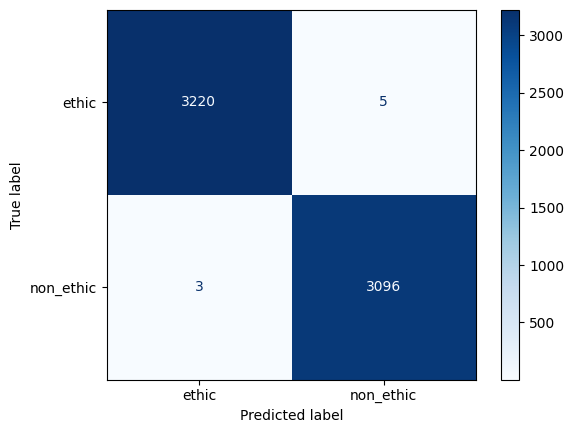

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

preds = trainer.predict(test_ds)
y_pred = preds.predictions.argmax(axis=1)
y_true = preds.label_ids

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["ethic", "non_ethic"])
disp.plot(cmap="Blues")
plt.show()

In [36]:
from PIL import Image
import torch

img = Image.open("/content/WhatsApp Image 2025-11-16 at 15.52.06.jpeg").convert("RGB")
inputs = processor(images=img, return_tensors="pt").to(model.device)

pred = model(**inputs).logits.argmax(-1).item()
print("Classe prédite :", "Non éthique" if pred==1 else "Éthique")

Classe prédite : Éthique


In [37]:
from PIL import Image
import torch

img = Image.open("/content/businessman-kicking-colleagues-attempting-climb-600nw-2551046417.webp").convert("RGB")
inputs = processor(images=img, return_tensors="pt").to(model.device)

pred = model(**inputs).logits.argmax(-1).item()
print("Classe prédite :", "Non éthique" if pred==1 else "Éthique")

Classe prédite : Non éthique


In [38]:
trainer.save_model("./vit_ethic_classifier_final")
processor.save_pretrained("./vit_ethic_classifier_final")

['./vit_ethic_classifier_final/preprocessor_config.json']